In [1]:
#I wanted to see what happened when 
#I calculated the crime rates for each of the neighborhoods and compared those with housing prices.

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import gmaps
from api_keys import g_key
gmaps.configure(api_key = g_key)

In [2]:
crime_data_csv = "data/neighborhood_crime.csv"
crime_data = pd.read_csv(crime_data_csv)
crime = crime_data.drop('Unnamed: 0', axis=1)
len(crime['Neighborhood'].unique())

90

In [3]:
#sort the dataframe alphabetically by neighborhood name.
crime_sort = crime.sort_values(by='Neighborhood', ascending=True)
len(crime_sort['Neighborhood'].unique())


90

In [4]:
#Reset the index
crime_clean = crime_sort.reset_index(drop=True)

In [5]:
crime_clean

,Precinct,Offense,Description,Latitude,Longitude,Neighborhood,Date of Offense,Offense Type,Community,COMMUNITY POPULATION
0,5.0,BURGD,Burglary of Dwelling,44.904221,-93.307364,ARMATAGE,2015-08-18,Violent,SOUTHWEST,49820.0
1,5.0,TFMV,Theft from Automobile,44.904229,-93.308636,ARMATAGE,2018-05-12,Non-Violent,SOUTHWEST,49820.0
2,5.0,TFMV,Theft from Automobile,44.901620,-93.318820,ARMATAGE,2018-05-12,Non-Violent,SOUTHWEST,49820.0
3,5.0,THEFT,Other Theft,44.895638,-93.308667,ARMATAGE,2018-03-29,Non-Violent,SOUTHWEST,49820.0
4,5.0,TMVP,Theft - Automobile Parts,44.895641,-93.309897,ARMATAGE,2018-01-21,Non-Violent,SOUTHWEST,49820.0
...,...,...,...,...,...,...,...,...,...,...
104734,2.0,TFMV,Theft from Automobile,45.012276,-93.240972,WINDOM PARK,2018-08-01,Non-Violent,NORTHEAST,38226.0
104735,2.0,TFMV,Theft from Automobile,45.006429,-93.245609,WINDOM PARK,2018-08-15,Non-Violent,NORTHEAST,38226.0
104736,2.0,TFMV,Theft from Automobile,45.011136,-93.242248,WINDOM PARK,2018-08-05,Non-Violent,NORTHEAST,38226.0
104737,2.0,THFTSW,Theft by Swindle,45.008406,-93.247370,WINDOM PARK,2018-09-28,Non-Violent,NORTHEAST,38226.0


In [6]:
#Create lists for the various stats that will be used in the summary table.
neighborhoods = []
neighborhood_crimes = []
violent_crimes = []
nonviolent_crimes = []

#Create a for loop that will collect the names of the neighborhoods and put them in the list for neighborhoods.
for index, row in crime_clean.iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood not in neighborhoods:
        neighborhoods.append(neighborhood)
        

In [7]:
len(neighborhoods)

90

In [8]:
#Create another for loop that will collect the number of crimes (total, violent and non-violent) for each neighborhood.

for neighborhood in neighborhoods:
    #This calculates the number of rows for each neighborhood to get a count of total crimes.
    neighborhood_crimes.append(crime_clean.loc[crime_clean['Neighborhood'] == neighborhood, 'Neighborhood'].count())
    #This creates a dataframe for each neighborhood, so that the rows for both violent and non-violent offenses can be counted.
    neighborhood_df = crime_clean.loc[crime_clean['Neighborhood'] == neighborhood]
    violent_crimes.append(neighborhood_df.loc[crime_clean['Offense Type'] == 'Violent', 'Offense Type'].count())
    nonviolent_crimes.append(neighborhood_df.loc[crime_clean['Offense Type'] == 'Non-Violent', 'Offense Type'].count())

In [9]:
len(neighborhood_crimes)

90

In [10]:
#Create a summary dataframe using the variables created above.
neigh_crime = pd.DataFrame({'Neighborhood':neighborhoods, 'Crimes':neighborhood_crimes,
                            'Violent Crimes':violent_crimes, 'Non-Violent Crimes':nonviolent_crimes})
neigh_crime

,Neighborhood,Crimes,Violent Crimes,Non-Violent Crimes
0,ARMATAGE,411,124,287
1,AUDUBON PARK,735,285,450
2,BANCROFT,630,275,355
3,BELTRAMI,296,98,198
4,BOTTINEAU,408,125,283
...,...,...,...,...
85,WEST CALHOUN,402,65,337
86,WHITTIER,4394,1319,3075
87,WILLARD-HAY,2139,1113,1026
88,WINDOM,859,247,612


In [12]:
#Export summary table.
neigh_crime.to_csv("data/neighborhood_crime_summary.csv", index=True, header=True)

In [13]:
#Import csv file containing the populations and crime stats for each neighborhood.  
#To expedite process, I combined the spreadsheet exported above with the pricing data from the housing analysis in excel.  
#This could have been done through a merge like I did with the community data in another notebook.
final_crime_csv = "data/neighborhood_crime_pop_final.csv"
final_crime = pd.read_csv(final_crime_csv)
final_crime

,Neighborhood,Crimes,Violent Crimes,Non-Violent Crimes,Price per Sq Ft,Population
0,ARMATAGE,411,124,287,164.491929,4934
1,AUDUBON PARK,735,285,450,136.846501,5125
2,BANCROFT,630,275,355,132.834754,3587
3,BELTRAMI,296,98,198,117.911368,1248
4,BOTTINEAU,408,125,283,133.694873,1656
...,...,...,...,...,...,...
79,WEST CALHOUN,402,65,337,241.728559,1760
80,WHITTIER,4394,1319,3075,162.582786,14815
81,WILLARD-HAY,2139,1113,1026,79.471309,9556
82,WINDOM,859,247,612,140.548350,5045


In [14]:
#Calculate crime rates.
final_crime['Crime Rate'] = final_crime['Crimes']/final_crime['Population']*200
final_crime['Violent Rate'] = final_crime['Violent Crimes']/final_crime['Population']*200
final_crime['Non-Violent Rate'] = final_crime['Non-Violent Crimes']/final_crime['Population']*200
final_crime

,Neighborhood,Crimes,Violent Crimes,Non-Violent Crimes,Price per Sq Ft,Population,Crime Rate,Violent Rate,Non-Violent Rate
0,ARMATAGE,411,124,287,164.491929,4934,16.659911,5.026348,11.633563
1,AUDUBON PARK,735,285,450,136.846501,5125,28.682927,11.121951,17.560976
2,BANCROFT,630,275,355,132.834754,3587,35.126847,15.333147,19.793699
3,BELTRAMI,296,98,198,117.911368,1248,47.435897,15.705128,31.730769
4,BOTTINEAU,408,125,283,133.694873,1656,49.275362,15.096618,34.178744
...,...,...,...,...,...,...,...,...,...
79,WEST CALHOUN,402,65,337,241.728559,1760,45.681818,7.386364,38.295455
80,WHITTIER,4394,1319,3075,162.582786,14815,59.318259,17.806277,41.511981
81,WILLARD-HAY,2139,1113,1026,79.471309,9556,44.767685,23.294265,21.473420
82,WINDOM,859,247,612,140.548350,5045,34.053518,9.791873,24.261645


In [15]:
#Export csv
final_crime.to_csv("data/final_crime_neighborhood.csv", index=False, header=True)

In [16]:
#Function for line regression.
def line_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = x * slope + intercept
    plt.plot(x_values, regress_values, "r-")
    plt.legend([line_eq + "\nr-squared = " + str(round(rvalue**2, 2))])
    print(line_eq)
    print("The r-squared value is " + str(round(rvalue**2, 2)))

y = 0.33x + 142.48
The r-squared value is 0.09


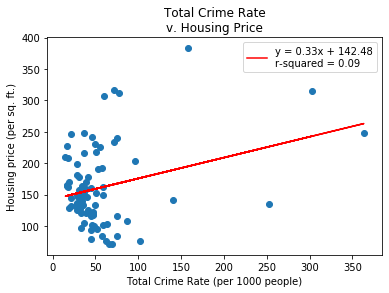

In [17]:
x_values = final_crime['Crime Rate']
y_values = final_crime['Price per Sq Ft']
line_reg(x_values, y_values)
plt.title('Total Crime Rate\nv. Housing Price')
plt.xlabel('Total Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.show()

y = -0.64x + 171.92
The r-squared value is 0.01


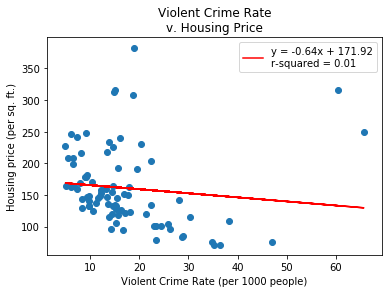

In [18]:
x_values = final_crime['Violent Rate']
y_values = final_crime['Price per Sq Ft']
line_reg(x_values, y_values)
plt.title('Violent Crime Rate\nv. Housing Price')
plt.xlabel('Violent Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.show()

y = 0.49x + 142.11
The r-squared value is 0.14


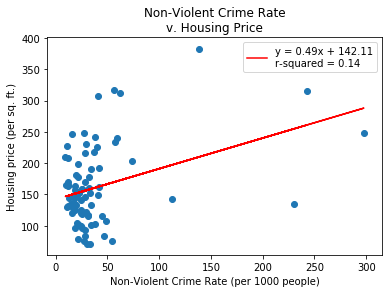

In [19]:
x_values = final_crime['Non-Violent Rate']
y_values = final_crime['Price per Sq Ft']
line_reg(x_values, y_values)
plt.title('Non-Violent Crime Rate\nv. Housing Price')
plt.xlabel('Non-Violent Crime Rate (per 1000 people)')
plt.ylabel('Housing price (per sq. ft.)')
plt.scatter(x_values, y_values)
plt.show()

In [20]:
#Read in csv file containing lat and lng data for neighborhoods.
final_neigh_lat_csv = "data/final_crime_neighborhood_latlng.csv"
final = pd.read_csv(final_neigh_lat_csv)


297.6525822

In [21]:
#Create variables to generate heat maps
locations = final[['Lat', 'Lng']]
ratingvc = final['Violent Rate']
ratingnc = final['Non-Violent Rate']

In [24]:
#Violent crime heat map
figvc = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=ratingvc, dissipating=False, max_intensity=90, point_radius=.018)
figvc.add_layer(heat_layer)
figvc


Figure(layout=FigureLayout(height='420px'))

In [23]:
#Non-violent crime heat map.
fignc = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=ratingnc, dissipating=False, max_intensity=150, point_radius=.018)
fignc.add_layer(heat_layer)
fignc


Figure(layout=FigureLayout(height='420px'))